In [1]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored


In [2]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [3]:
#Importing the data
loan = pd.read_csv("loan.csv")

In [4]:
#exploring the data using various parameters.
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#Check the datatypes of all the columns of the dataframe
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
#shape of data frame
loan.shape

(39717, 111)

#### Missing Value Treatment

In [7]:
#Check the number of null values in the columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
#Finding percentage of null or missing values
null_perc = round(100*(loan.isnull().sum()/len(loan.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


In [9]:
#Removing columns which has more than 30% null values in it.
loan.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [10]:
#Check the shape of the dataframe
loan.shape


(39717, 53)

### Check columns with unique or single values of the dataframe.

In [11]:
#Finding number of unique values

unique_col = loan.nunique()

unique_col.sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

### Drop those columns having single value as they cannot contribute to our analysis

In [12]:
#Select Single Value columns 
single_val_col = unique_col[unique_col.values ==1]

In [13]:
#Check single value columns names
single_val_col.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [14]:
# Drop the single value columns 
loan.drop(columns = list(single_val_col.index), inplace=True)

In [15]:
#Check the shape of the dataframe
loan.shape

(39717, 44)

In [16]:
#Finding number of unique values, printing high unique valued columns
loan.nunique().sort_values(ascending=False).head(12)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
dtype: int64

emp_title, and title columns have text values which are more unique values.

In [17]:
loan.drop(['emp_title', 'title'], axis=1, inplace=True)

id, url, and member_id having all unique values which means any one of these can be used as primary key.
Let's use id primary key and remove url and member id columns.

In [18]:
loan.drop(['member_id', 'url'], axis=1, inplace=True)

total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv variables are valid for barrowers who already took loan. As we are only interested only in loan application details these columns can be removed.
recoveries, collection_recovery_fee columns are only valid for charged off loans.
Will removed these colomns.

In [19]:
loan.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
loan.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [20]:
#Finding percentage of null or missing values
null_perc = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_perc[ null_perc > 0 ]

emp_length             2.71
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

Removing the the null valued rows in the above columns.

In [21]:
loan.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#Finding percentage of null or missing values
null_perc = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

In [22]:
#Check the shape of the dataframe
loan.shape

(37898, 31)

Loan Status Column has 3 distict values out of them we need only _Fully Paid_ and _Charged Off_. So, we will remove the rows with _Current_ values in loan status.

In [23]:
#Removing current loan status rows
loan = loan[loan.loan_status != 'Current']

In [24]:
#Checking unique values for term column
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

There is empty space at the start of values.

In [25]:
#Stripping empty space in values in term
loan['term'] = loan.term.str.strip()
loan.term.unique()

array(['36 months', '60 months'], dtype=object)

In [26]:
loan.shape

(36800, 31)

In [27]:
# Finding datatype in all coulmns
loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

int_rate and revol_util are having '%' symbol values and having data type of object.

In [28]:
#remove % at the end and convert to float
loan['int_rate'] = loan.int_rate.str.strip('%').astype(float)
loan['revol_util'] = loan.revol_util.str.strip('%').astype(float)

In [29]:
#converting to date type
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
loan['issue_d'] = loan['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [30]:
# Converted to proper datatypes for analysis
loan.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

### Derived Variables

In [31]:
#create new columns from date type columns
#issue_d column
loan['issue_d_year'] = loan.issue_d.dt.year
loan['issue_d_month'] = loan.issue_d.dt.strftime('%b')
loan['issue_d_weekday'] = loan.issue_d.dt.weekday
#data type conversion of year and weekday
loan['issue_d_year'] = loan['issue_d_year'].astype(object)
loan['issue_d_weekday'] = loan['issue_d_weekday'].astype(object)

#earliest_cr_line
loan['earliest_cr_line_year'] = loan.earliest_cr_line.dt.year
loan['earliest_cr_line_month'] = loan.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
loan['earliest_cr_line_year'] = loan['earliest_cr_line_year'].astype(object)

Creating Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount.

In [32]:
loan['approved_loan_amnt_ratio'] = round(loan.funded_amnt_inv*100/loan.loan_amnt,2)

In [33]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,approved_loan_amnt_ratio
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,5863.16,5833.84,171.62,0.00,2011,Dec,3,1985,Jan,99.50
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,1008.71,1008.71,119.66,0.00,2011,Dec,3,1999,Apr,100.00
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,3005.67,3005.67,649.91,0.00,2011,Dec,3,2001,Nov,100.00
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,12231.89,12231.89,357.48,0.00,2011,Dec,3,1996,Feb,100.00
5,1075269,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,5632.21,5632.21,161.03,0.00,2011,Dec,3,2004,Nov,100.00


In [34]:
# Converted date formats for analysis
loan.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec    


## Outlier Treatment

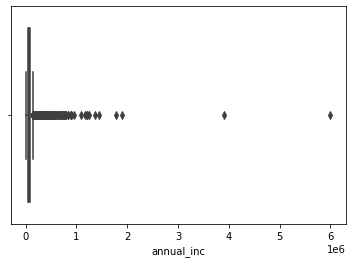

In [35]:
sns.boxplot(loan['annual_inc'])
plt.show()

In [36]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50    60000.00
0.75    83000.00
0.90   116738.90
0.95   142000.00
0.97   165996.12
0.98   188023.92
0.99   235000.00
Name: annual_inc, dtype: float64

In [37]:
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= per_95_annual_inc]

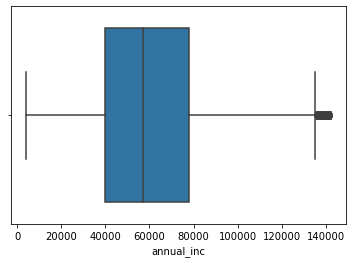

In [38]:
sns.boxplot(loan.annual_inc)
plt.show()

### Now the "annual_inc" data looks good and proceeding next.
- Let's analyze other numerical variables which could possibly have outliers.
- dti
- loan_amnt
- funded_amnt_inv 

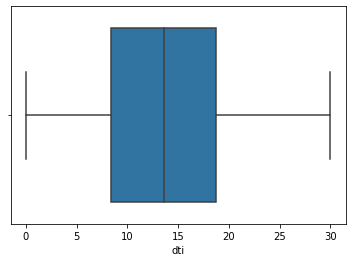

In [39]:
sns.boxplot(loan.dti)
plt.show()

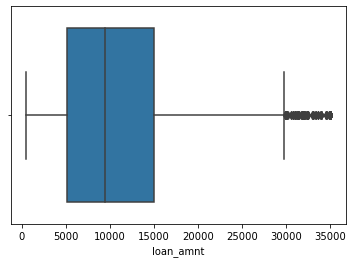

In [40]:
sns.boxplot(loan.loan_amnt)
plt.show()

In [41]:
loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.75   15000.00
0.90   20000.00
0.95   25000.00
0.97   26000.00
0.97   28000.00
0.98   30000.00
0.99   35000.00
1.00   35000.00
Name: loan_amnt, dtype: float64

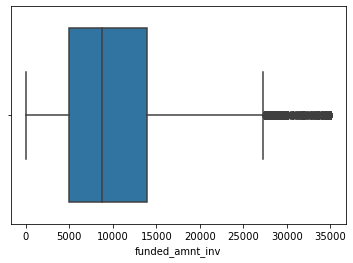

In [42]:
sns.boxplot(loan.funded_amnt_inv)
plt.show()

In [43]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.50    8725.00
0.75   13925.00
0.90   19850.00
0.95   23975.00
0.97   24975.00
0.97   25840.53
0.98   27975.00
0.98   29975.00
0.99   32000.00
1.00   35000.00
Name: funded_amnt_inv, dtype: float64

- Though there are some values far from distribution, the distribution is pretty continoused there is no need to remove outliers / extreme values for these above columns.

## Univariate Analysis

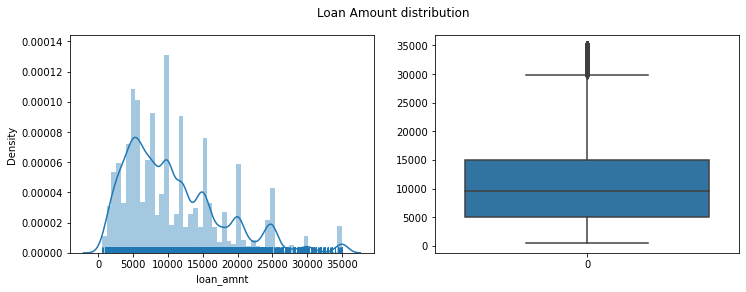

In [44]:
# Loan Amount
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=loan.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=loan.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [45]:
#Stats of laon amount
loan.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   34972.00
mean    10778.63
std      7067.55
min       500.00
5%       2400.00
10%      3150.00
25%      5125.00
50%      9500.00
75%     15000.00
90%     20000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

**Observations**:<br>
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

### funded_amnt
The total amount committed to that loan at that point in time.

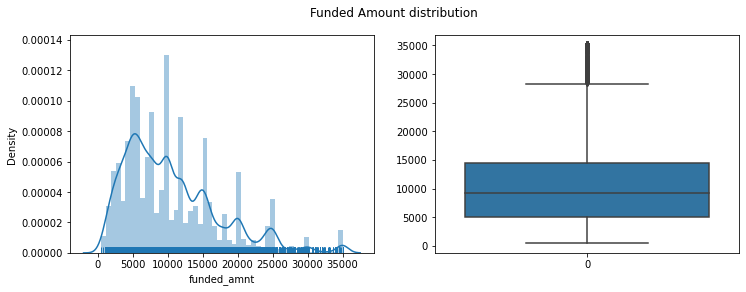

In [46]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [47]:
loan.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   34972.00
mean    10526.72
std      6817.15
min       500.00
5%       2400.00
10%      3100.00
25%      5000.00
50%      9150.00
75%     14400.00
90%     20000.00
95%     25000.00
99%     34711.25
max     35000.00
Name: funded_amnt, dtype: float64

**Observations**:<br>
Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.

### funded_amnt_inv
The total amount committed by investors for that loan at that point in time.

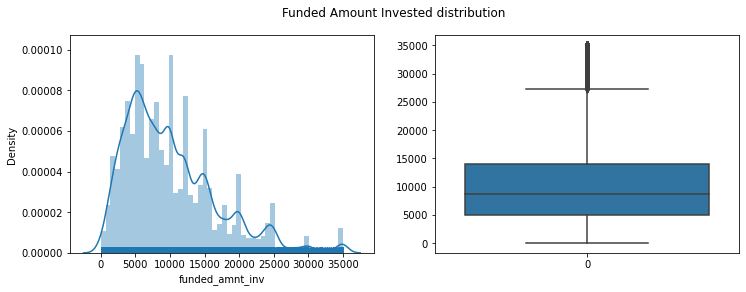

In [48]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [49]:
loan.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   34972.00
mean    10101.50
std      6717.73
min         0.00
5%       2000.00
10%      3000.00
25%      5000.00
50%      8725.00
75%     13925.00
90%     19850.00
95%     23975.00
99%     32000.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

**Observations:**  
Funded amount investment data behaves similar to loan Amount, Which tells us that Lending club approved atmost of Applied loan amount.

### Approved Loan Amount Ratio

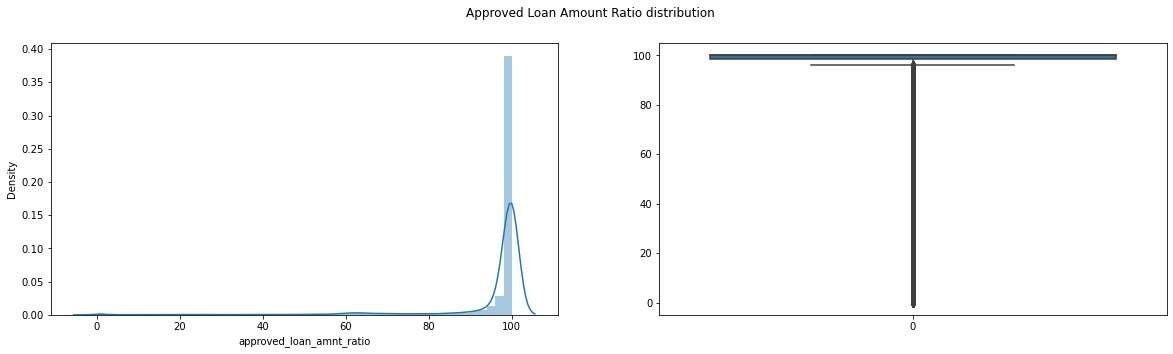

In [50]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=loan.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=loan.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

**Observations**:
70% of Borrowers got 100% loan amount from investors.

### Interest Rate

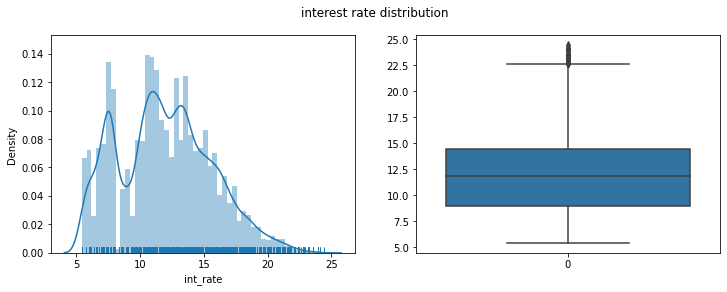

In [51]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

**Observations**:<br>
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between **9% to 14.5%**. Some people took loan at higher rates of interest i.e., **22.5%**

### Installment
The monthly payment owed by the borrower if the loan originates.

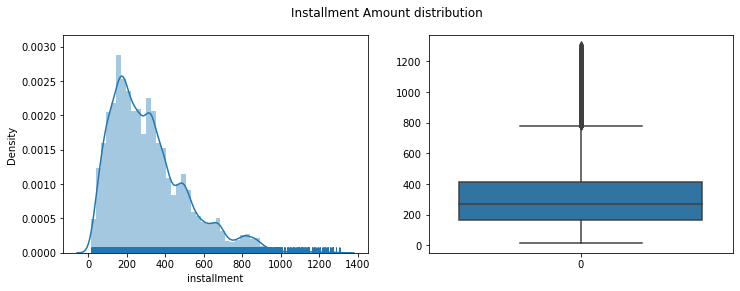

In [52]:
installment = loan.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

**Observations**:<br>
The Most representative value of Installment amount in around 280.

# annual_inc
The self-reported annual income provided by the borrower during registration.

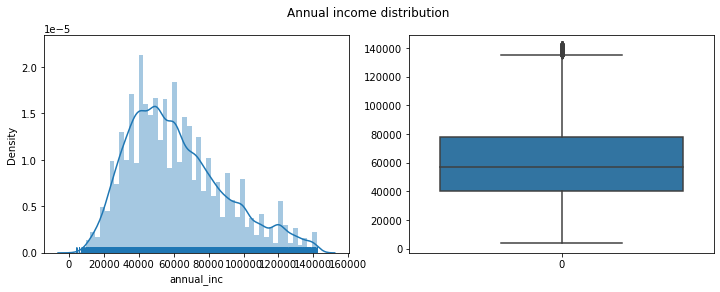

In [53]:
var1 = loan.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

**Observations**:<br>
Around 361 people are having more the 235000 annual income. and 99% of people are having incomes below 235000.

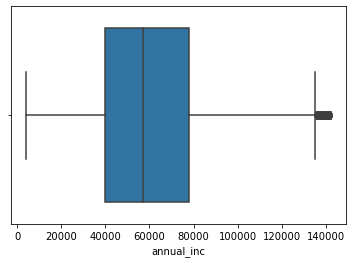

In [54]:
#testing
sns.boxplot(loan.annual_inc)
plt.show()

**Observations**:<br>
Around 361 people are having more the 235000 annual income. and 99% of people are having incomes below 235000.

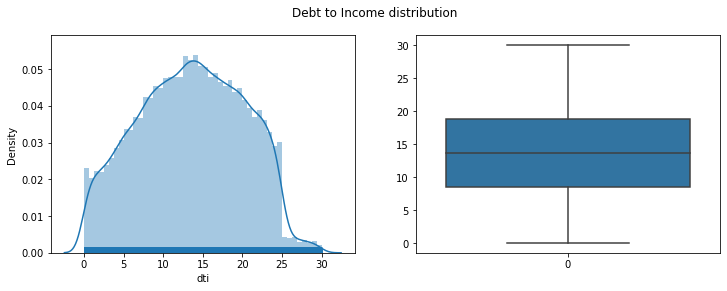

In [55]:
var1 = loan.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

**Observations**:<br>
Looks like there are no outliers and the distribution is very much similar to normal distribution.
This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

### Pub rec
Number of Public derogatory records

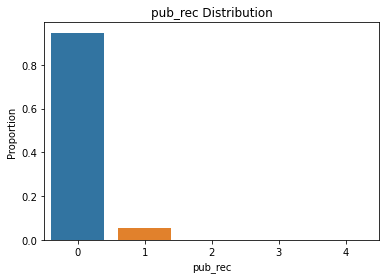

In [56]:
var = 'pub_rec'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**<br>
Around 90% borrower's are having no public derogatory records.

# pub_rec_bankruptcies
Number of public record bankruptcies

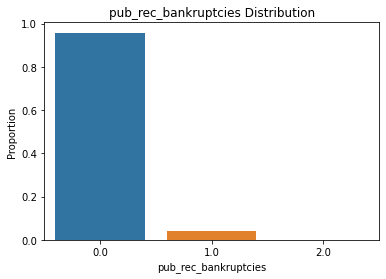

In [57]:
var = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
99% people have not went bankrupt.

### Loan issue date (issue_d)

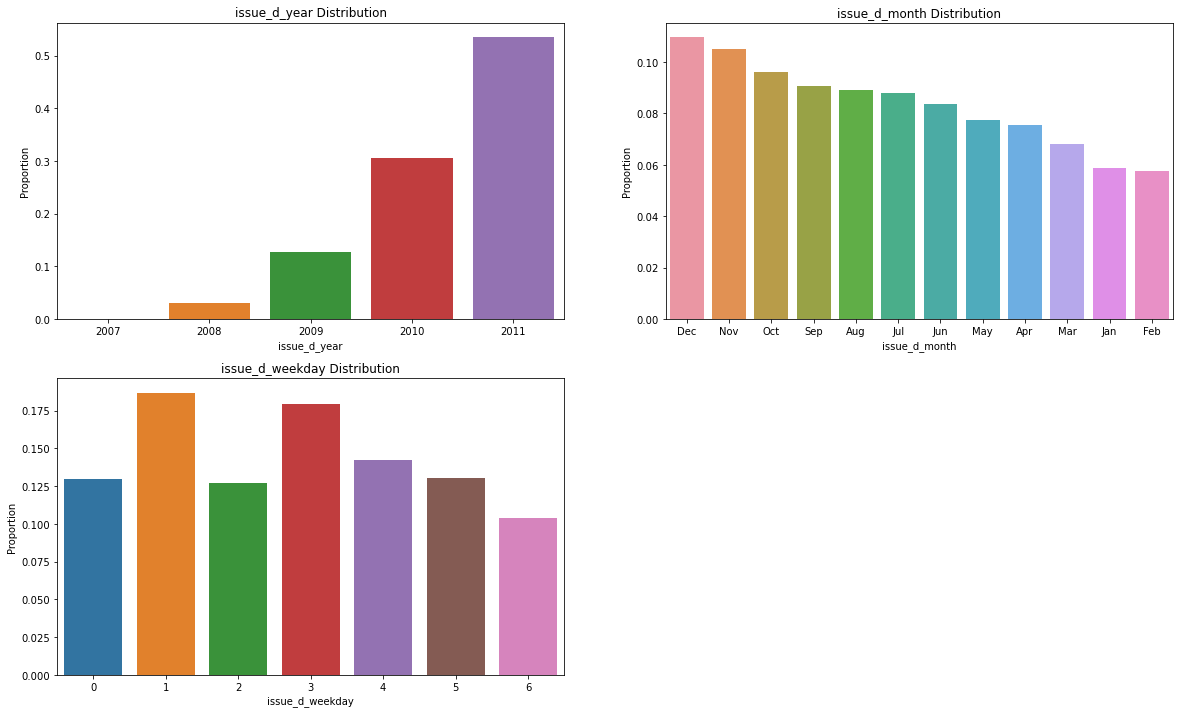

In [58]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

**Observations**:<br>
The lending club(LC) has doubling loan issues every year. <br>
There are more issues of loan in last 3 months every end of the year i.e., Oct, Nov and Dec. <br>
LC has issued more loans on tuesday and wednessday than other week days.

### Erliest Credit line (earliest_cr_line)

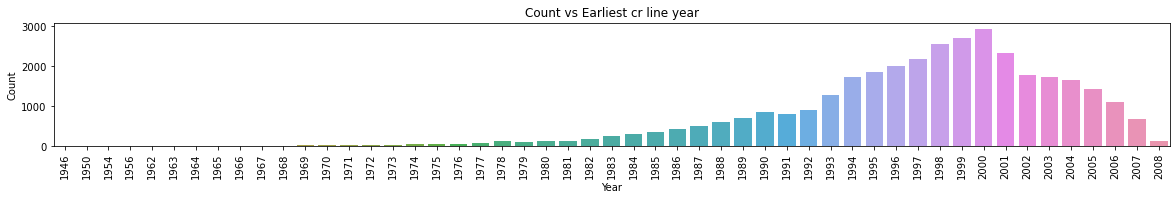

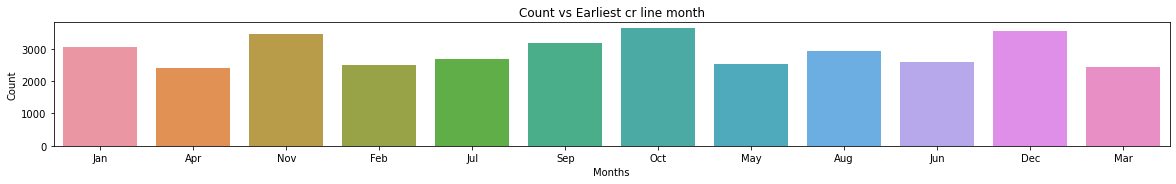

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(loan.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(loan.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

**Observations**:  
Many of Loan borrowers of LC have got earlier credit line in 2000 year, and also most have got earlier credit line on end of the year i.e., Oct, Nov, Dec

### Term

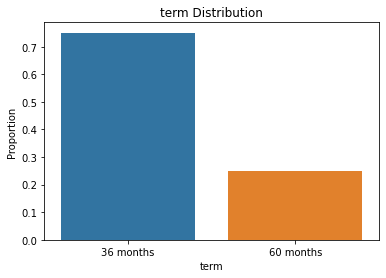

In [60]:
var = 'term'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
borrowers have taken 36 months tenure more than 60 months.


### Grade

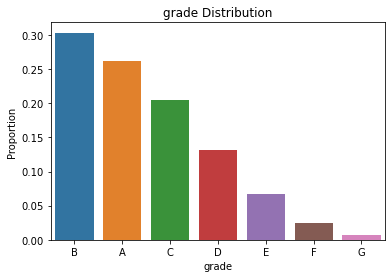

In [61]:
var = 'grade'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**: <br>
Most borrowers fall under A and B grades then other grades


###  Sub Grade

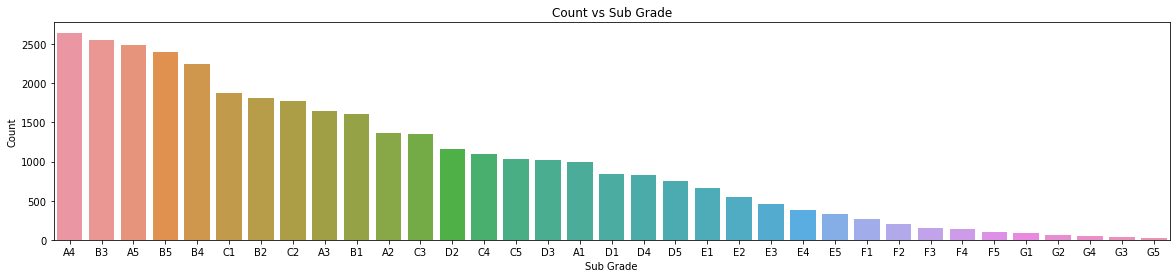

In [62]:
plt.figure(figsize=(20,4))
sns.countplot(loan.sub_grade, order=loan.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()


### Employment length

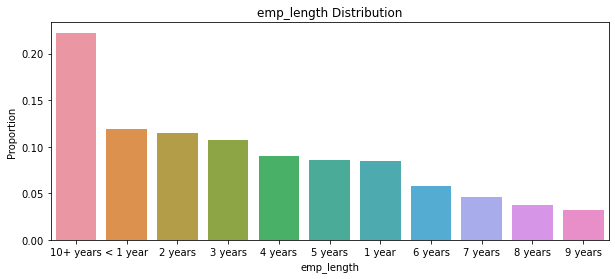

In [63]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
Borrowers are mostly 10+ years emploment length.

 
### Home Ownership

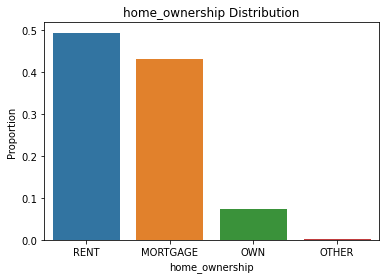

In [64]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
The loan borrowers are mostly having rented and mortgage houses.

### Verification Status

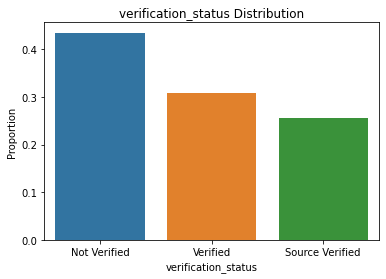

In [65]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
Majority of loans were given without verification of applicants income.


### Loan Status

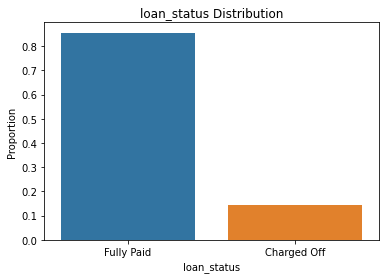

In [66]:
#plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
85% of borrowers has paid the loan fully. where are 15% are defaulted the loan.


### Purpose

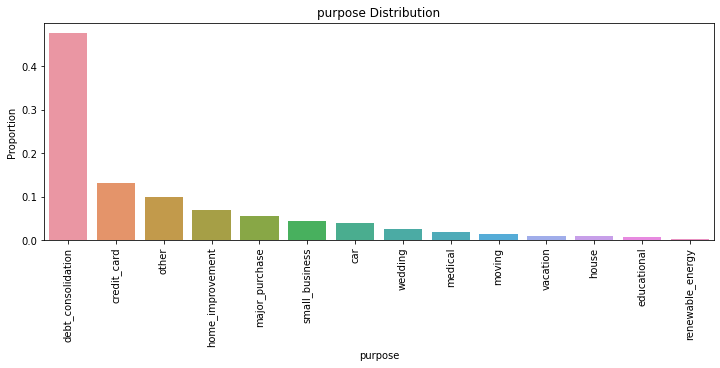

In [67]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
Looks line more number of people took loan for _debt consolidation_ and a very few people took for _renewable energy_


### Borrower's State (add_state)

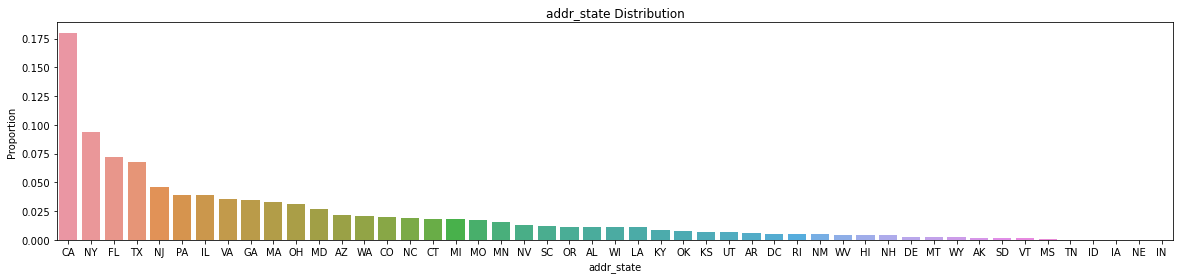

In [68]:
plt.figure(figsize=(20,4))
var = 'addr_state'
#Probability / Percentage of each values
prob_df = loan[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations**:<br>
Most of the borrowers are from _CA_ and _NY_



## Segmented Univariate Analysis

### Loan Amount

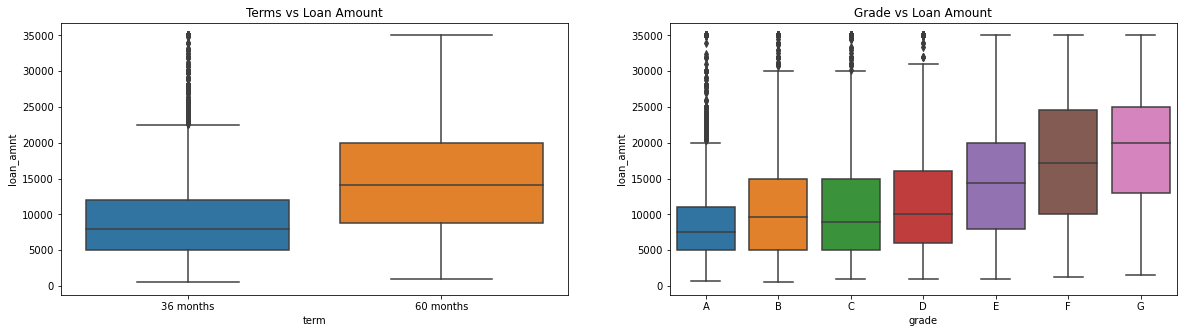

In [69]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.loan_amnt, data=loan)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.loan_amnt, order = grade_ord, data=loan)
plt.show()

**Observations**:<br>
Higher amount loans have high tenure i.e, 60 months.  
Grade 'G' and 'F' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

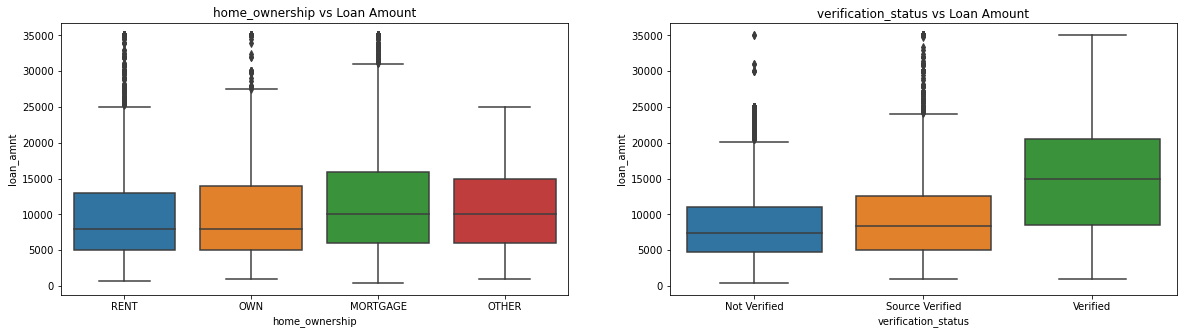

In [70]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan.loan_amnt, data=loan)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.loan_amnt, order = verification_status_ord, data=loan)
plt.show()

**Observations**:<br>
more borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.  
And most of borrowers are verified for borrowing loan >9k

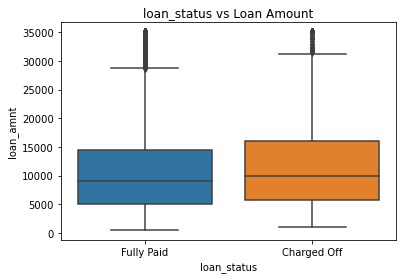

In [71]:
sns.boxplot(x='loan_status', y=loan.loan_amnt, data=loan)
plt.title('loan_status vs Loan Amount')
plt.show()

**Observations**:<br>
Charged Off loans have higher amounts than Fully Paid ones.

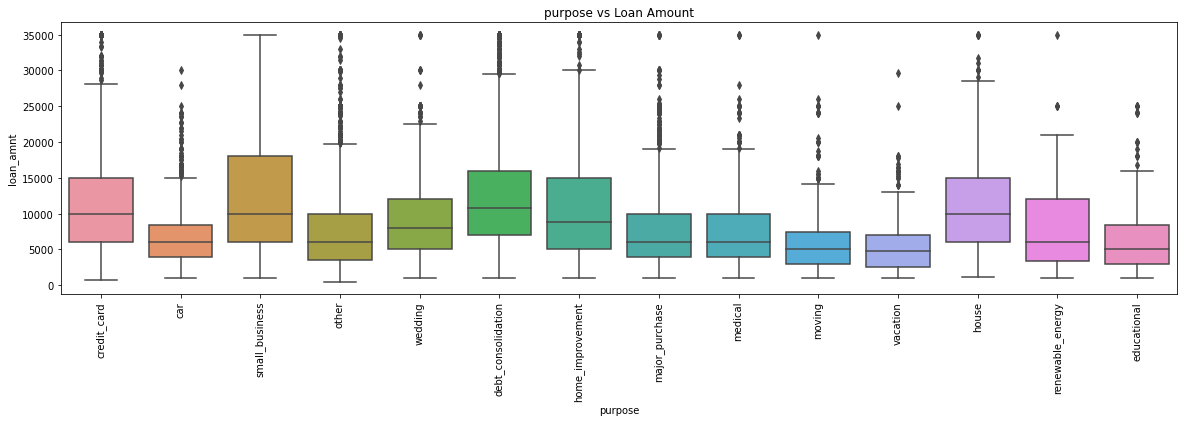

In [72]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.loan_amnt, data=loan)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')
plt.show()

**Observations**:  
More loan amount is from Small bussiness followed by debt consolidation.

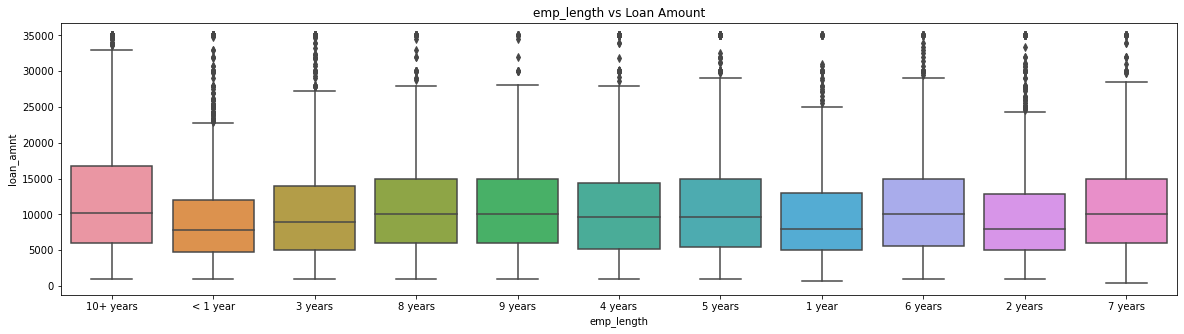

In [73]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.loan_amnt, data=loan)
plt.title('emp_length vs Loan Amount')
plt.show()

**Observations**:  
more borrowers are from 10+ years and least is <1 year

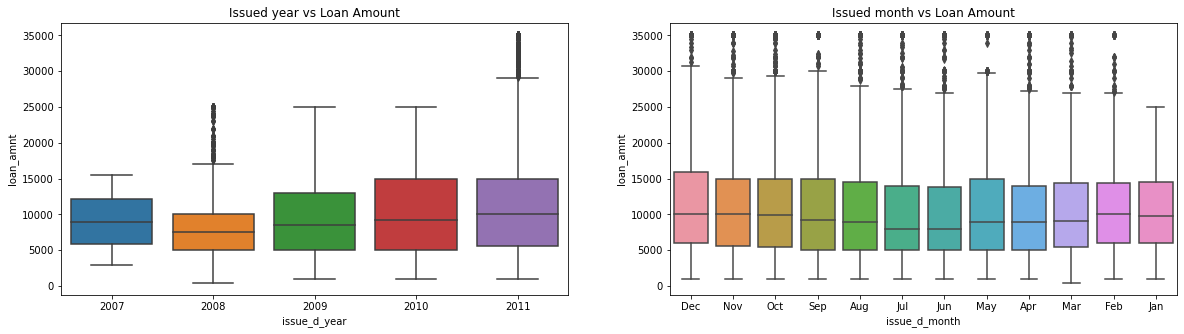

In [74]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan.issue_d_year, y=loan.loan_amnt, data=loan)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=loan.issue_d_month, y=loan.loan_amnt, data=loan)
plt.title('Issued month vs Loan Amount')
plt.show()

**Observations**:<br>
* The meadian loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.  
* Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.<br>
* Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.



### funded_amnt

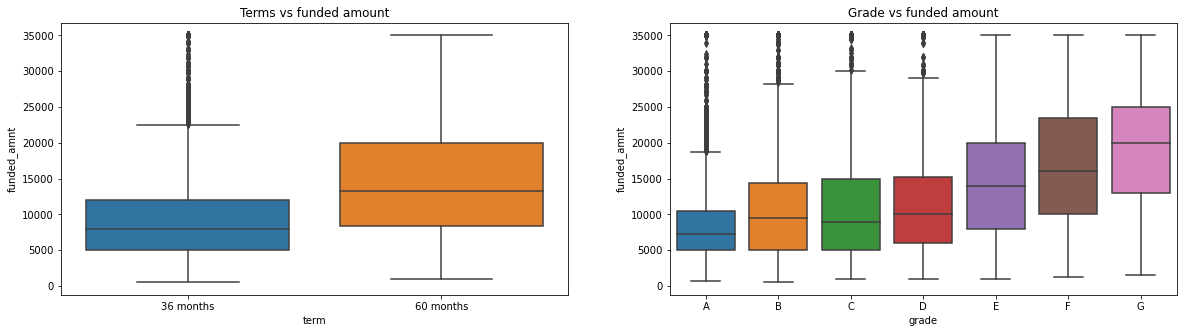

In [75]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.funded_amnt, data=loan)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.funded_amnt, order = grade_ord, data=loan)
plt.show()

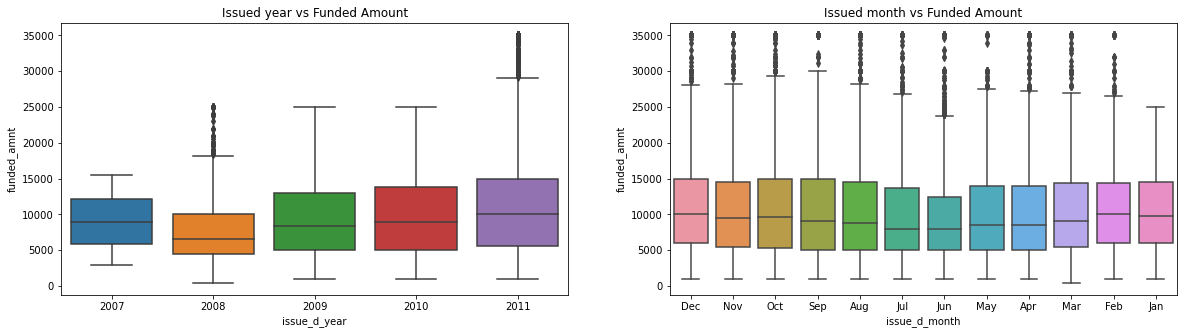

In [76]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan.issue_d_year, y=loan.funded_amnt, data=loan)
plt.title('Issued year vs Funded Amount')
plt.subplot(122)
sns.boxplot(x=loan.issue_d_month, y=loan.funded_amnt, data=loan)
plt.title('Issued month vs Funded Amount')
plt.show()

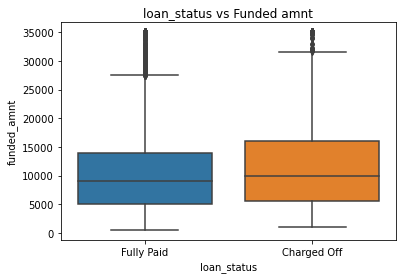

In [77]:
sns.boxplot(x='loan_status', y=loan.funded_amnt, data=loan)
plt.title('loan_status vs Funded amnt')
plt.show()

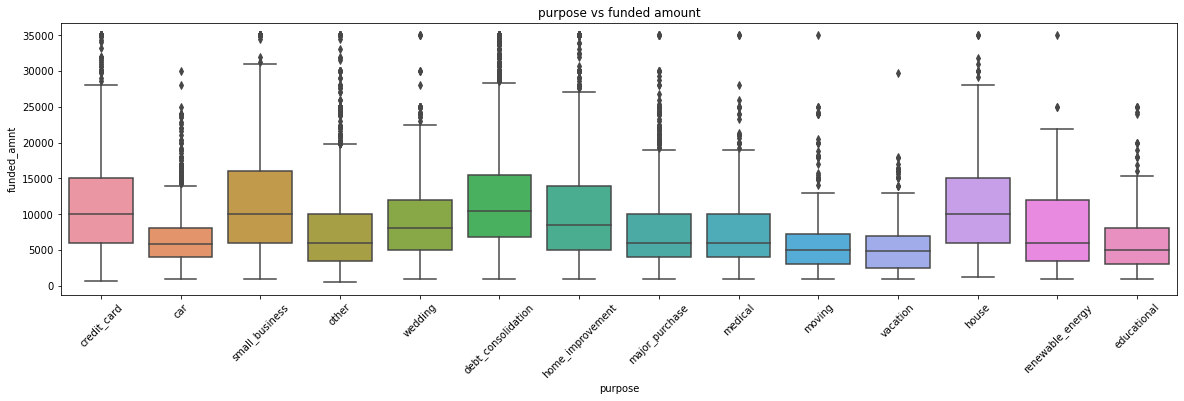

In [78]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.funded_amnt, data=loan)
plt.title('purpose vs funded amount')
plt.xticks(rotation=45)
plt.show()

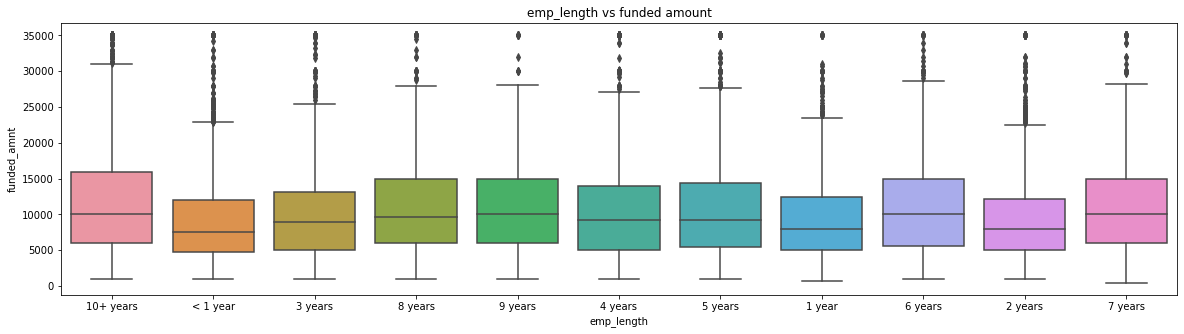

In [79]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.funded_amnt, data=loan)
plt.title('emp_length vs funded amount')
plt.show()

**Observations**:<br>
The Funded Amount has similar observations as Loan Amount.

### int_rate

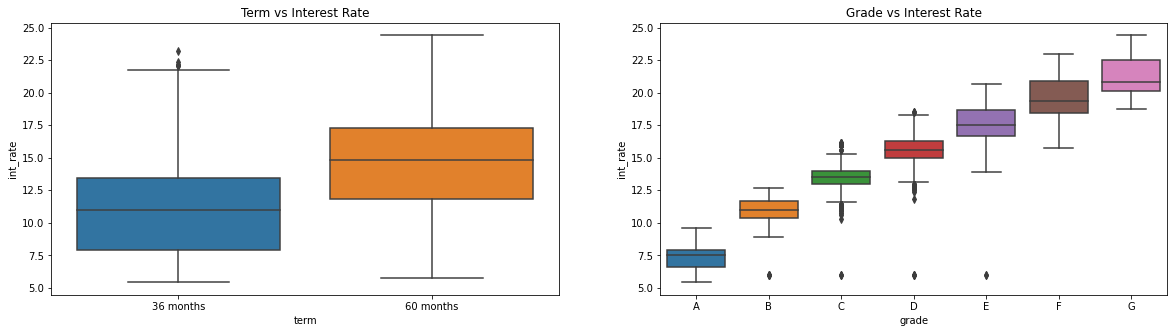

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.int_rate, data=loan)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.int_rate, order = grade_ord, data=loan)
plt.show()

**Observation**:  
The interest rates are higher for Higher tenure loans.  
And Also Interest Rates are Higher as Grades are Lowering (A to G).

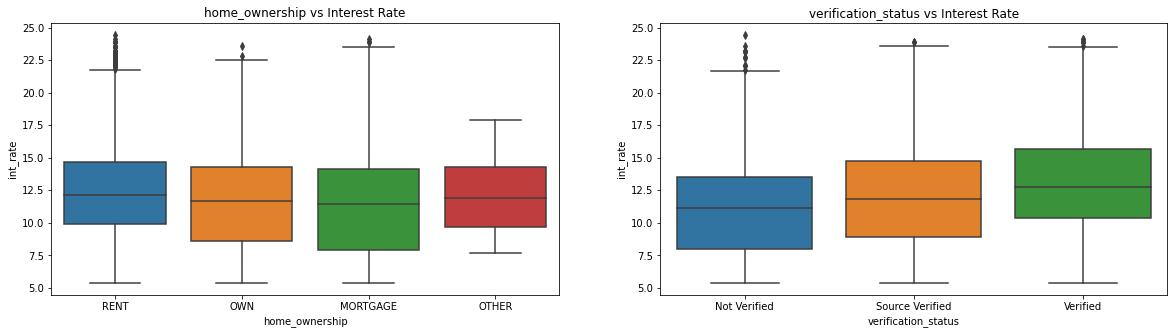

In [81]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan.int_rate, data=loan)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.int_rate, order = verification_status_ord, data=loan)
plt.show()

**Observations**:  
* Barrowers with Own and Mortgage got loans with less interest rates as the security will be there.  
* And The Non Verified Barrowers got less interest rates compared to Verified and Source Verified barrowers.

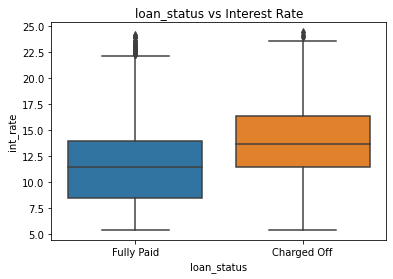

In [82]:
sns.boxplot(x='loan_status', y=loan.int_rate, data=loan)
plt.title('loan_status vs Interest Rate')
plt.show()

**Observations**:  
This clearly tells us, grater the interest rate more the chance of Defaulting the loan.

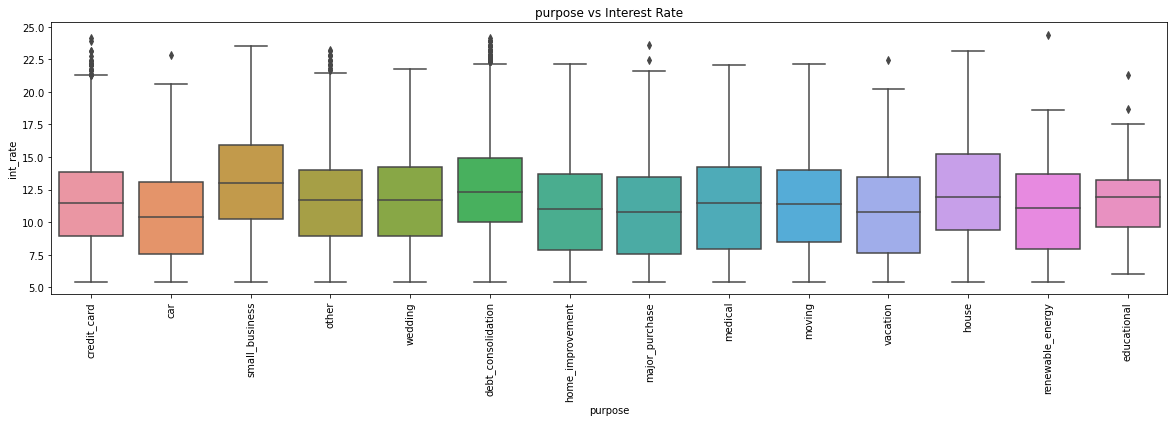

In [83]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.int_rate, data=loan)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')
plt.show()

**Observations**:  
Small Business, Debt Consolidation and House loans are given with more interest rates comparativesly others.

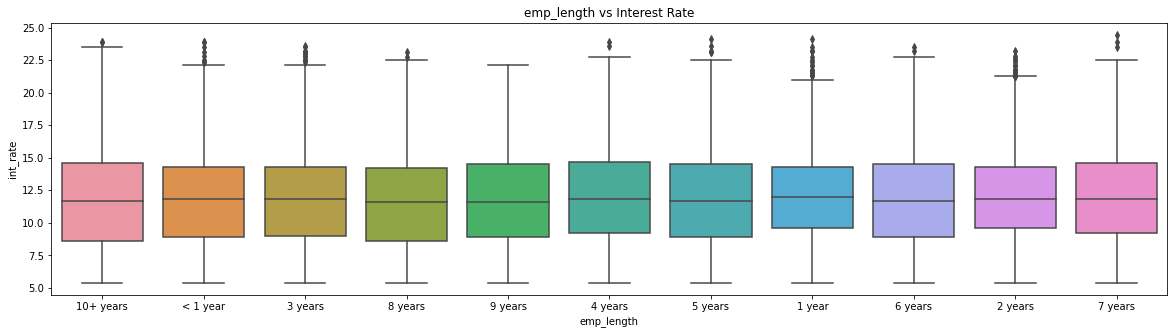

In [84]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.int_rate, data=loan)
plt.title('emp_length vs Interest Rate')
plt.show()

**Observations**:  
Looks like there is no much relation between Employment length and interest rate.

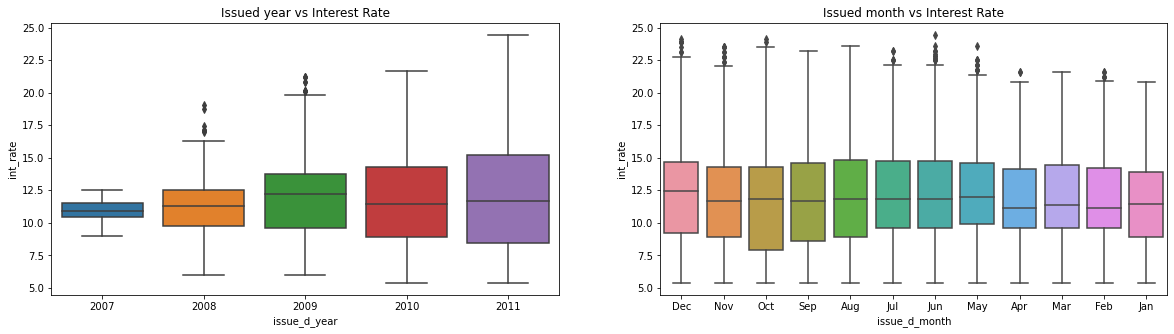

In [85]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan.issue_d_year, y=loan.int_rate, data=loan)
plt.title('Issued year vs Interest Rate')
plt.subplot(122)
sns.boxplot(x=loan.issue_d_month, y=loan.int_rate, data=loan)
plt.title('Issued month vs Interest Rate')
plt.show()

**Observations**:  
As the years of business increase the interest rates are getting more diversed but median of of interest rate is quite same in all the years.  


# annual_inc

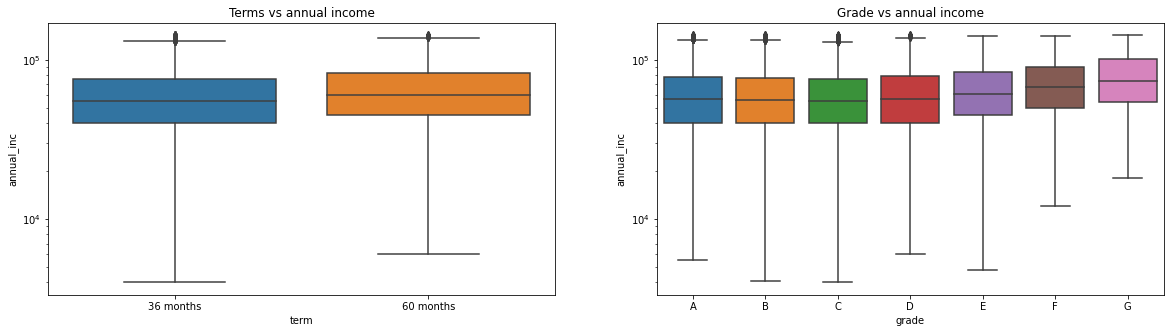

In [86]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.annual_inc, data=loan)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.annual_inc, order = grade_ord, data=loan)
plt.yscale('log')
plt.show()

**Observations:**  
Comparatively Annual income is higher for lower grades.

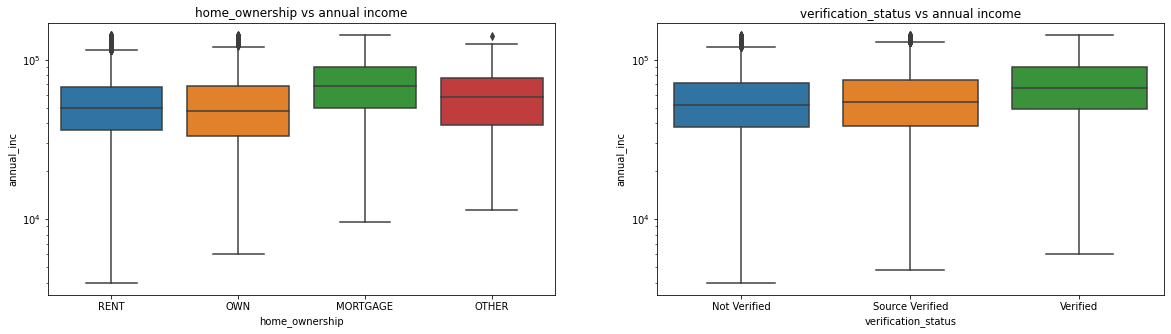

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan.annual_inc, data=loan)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.annual_inc, order = verification_status_ord, data=loan)
plt.yscale('log')
plt.show()

**Observations:**  
The home ownership status for MORTAGE has higher income.  
The income source was verfied for most of the borrower's who had higher annual incomes.

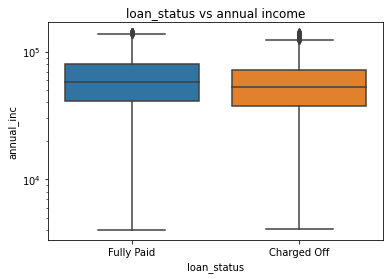

In [88]:
sns.boxplot(x='loan_status', y=loan.annual_inc, data=loan)
plt.title('loan_status vs annual income')
plt.yscale('log')
plt.show()

**Observations:**    
Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.

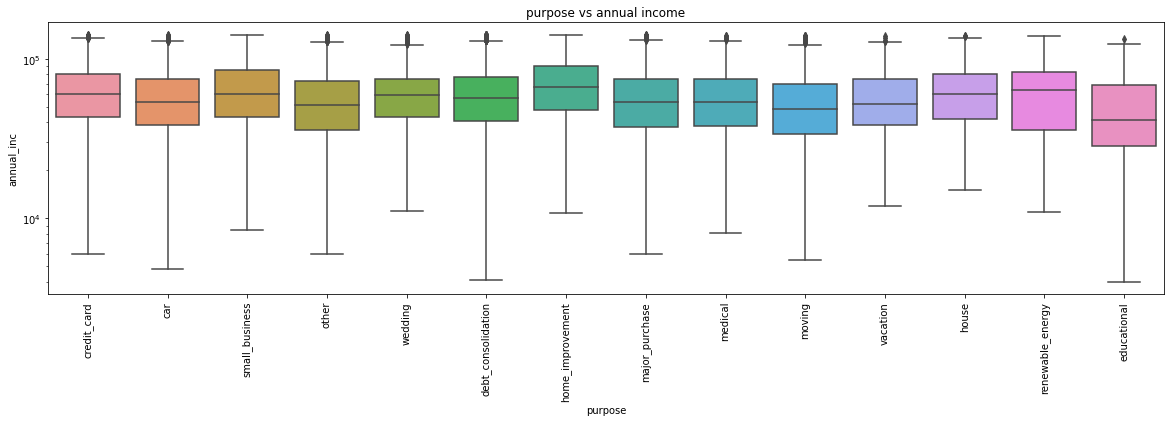

In [89]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.annual_inc, data=loan)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')
plt.show()

**Observations:**  
A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request. 

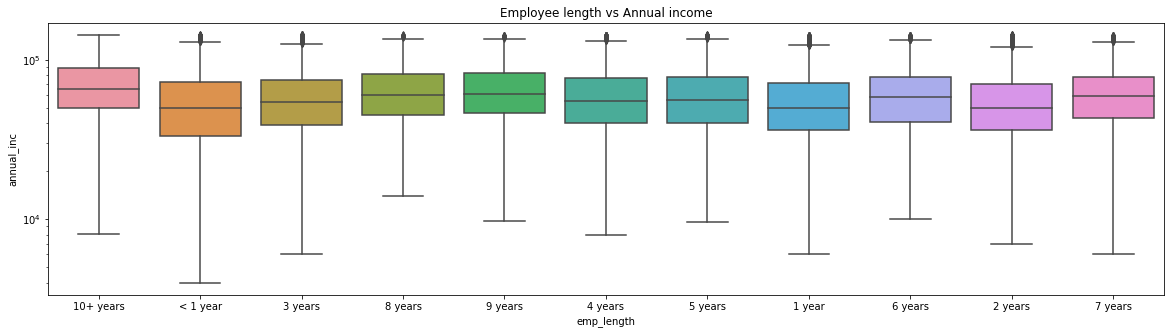

In [90]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.annual_inc, data=loan)
plt.title('Employee length vs Annual income')
plt.yscale('log')
plt.show()

**Observations:**  
The borrower's who has higer income have taken loans for 10+ years of duration.

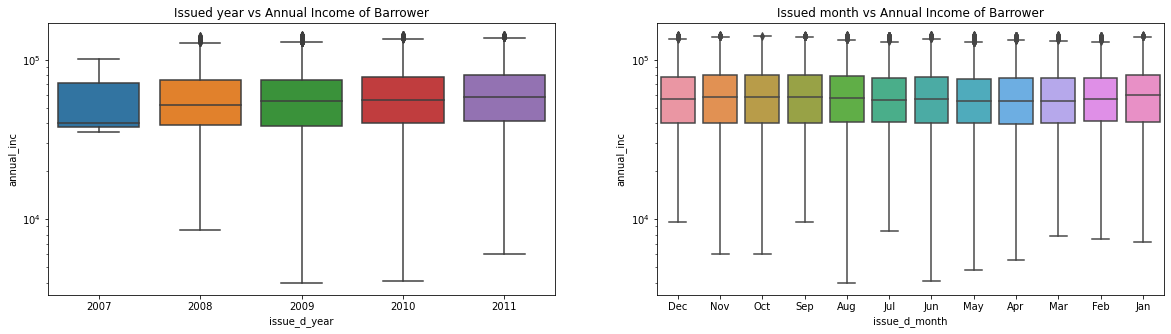

In [91]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan.issue_d_year, y=loan.annual_inc, data=loan)
plt.title('Issued year vs Annual Income of Barrower')
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=loan.issue_d_month, y=loan.annual_inc, data=loan)
plt.title('Issued month vs Annual Income of Barrower')
plt.yscale('log')
plt.show()

**Observations:**  
Annual income has no impact with the month when the loan was funded


# DTI
Debt to Income Ratio

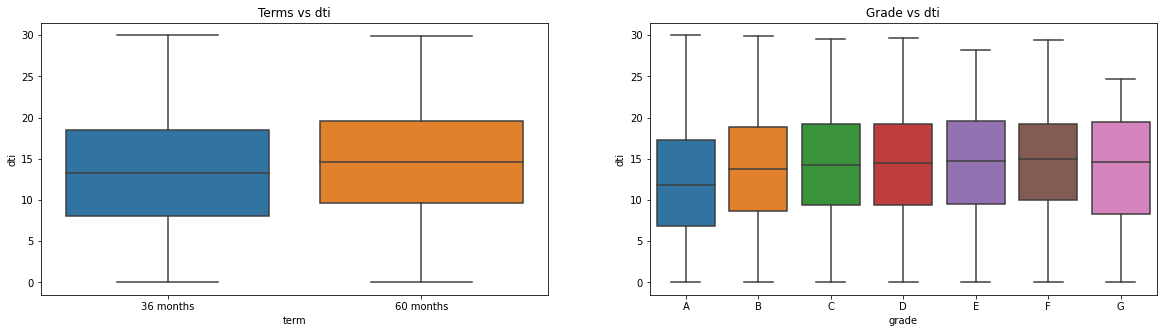

In [92]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.dti, data=loan)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan.dti, order = grade_ord, data=loan)
plt.show()

**Observation**:   
DTI is bit high for people who got more tenure i.e., 60 months.  
A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.

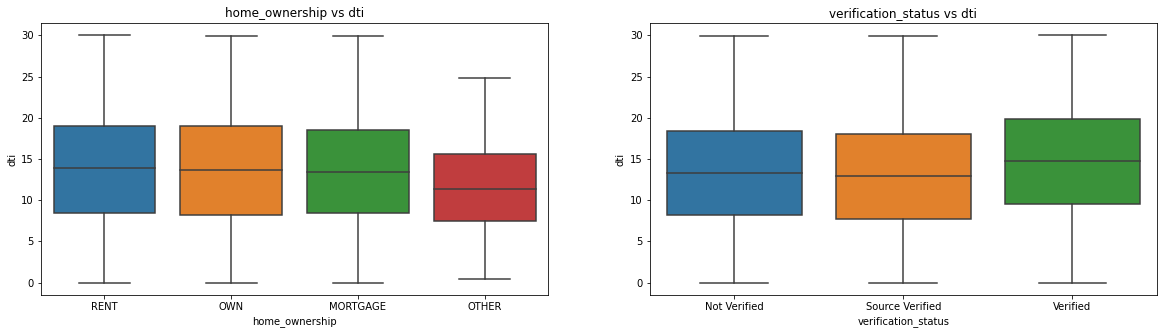

In [93]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan.dti, data=loan)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan.dti, order = verification_status_ord, data=loan)
plt.show()

**Observations**:  
People in Other home ownership has less DTI than others. This is may be bacause other people have mortgage and home loans.

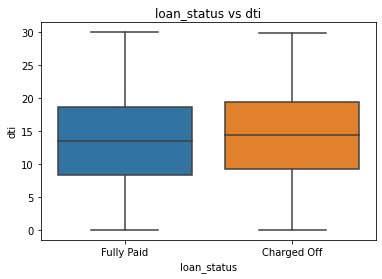

In [94]:
sns.boxplot(x='loan_status', y=loan.dti, data=loan)
plt.title('loan_status vs dti')
plt.show()

**Observations**  
Borrowers with high DTI has bit more probability to default

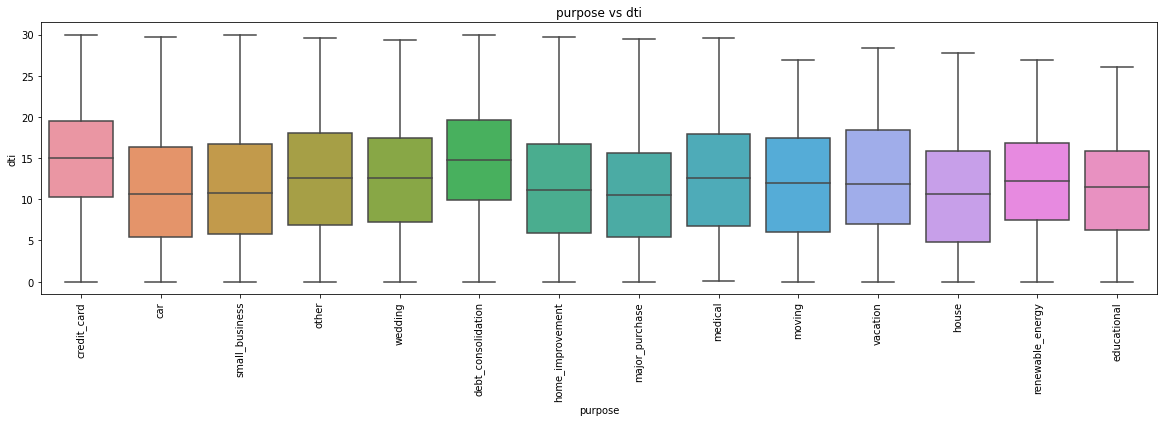

In [95]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.dti, data=loan)
plt.xticks(rotation=90)
plt.title('purpose vs dti')
plt.show()

**Observations**:  
People who took loan for _credit card_ and _debt consolidation_ purpose has more DTI than other purposes.

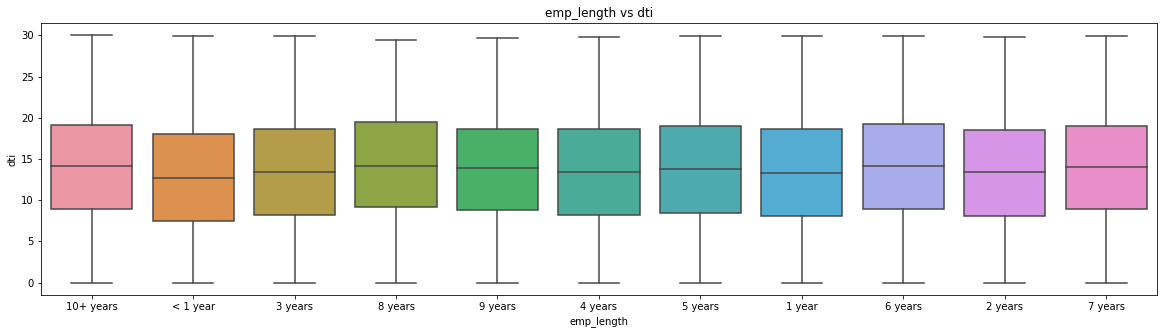

In [96]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.dti, data=loan)
plt.title('emp_length vs dti')
plt.show()

**Observations**:   
The dti is pretti much similar for barrowers with all the employment length.


# pub_rec
Number of derogatory public records

In [97]:
#Finding proportation of values in each value of category
df = loan.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

,pub_rec,term,id,proportion
0,0,36 months,24899,0.75
1,0,60 months,8192,0.25
2,1,36 months,1312,0.72
3,1,60 months,518,0.28
4,2,36 months,34,0.79
5,2,60 months,9,0.21
6,3,36 months,6,1.00
7,4,36 months,2,1.00


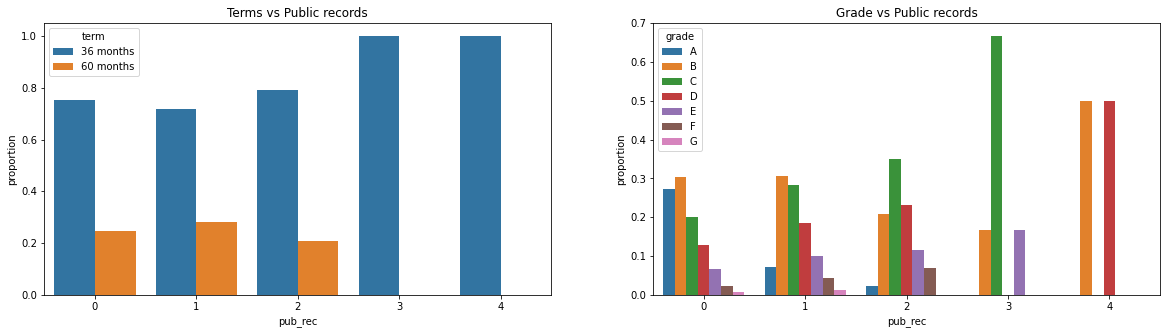

In [98]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')

df = loan.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)
plt.show()

**Observations**:  
* Borrwers higher public derogatory records took loan for 36 months tenure. where as 80% and 20% distribution between 36 and 60months tenure for lower public derogatory records borrowers.  
* We can see the grades are really showing some pattern. A grade people are having less derogatory records then other grades.  
* Exceptionally C,D,E graded people are having high pub_recs.

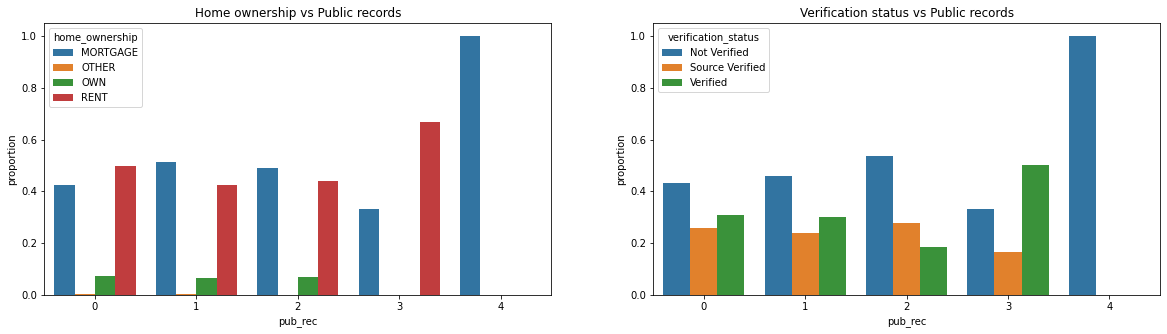

In [99]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df = loan.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')

df = loan.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)

plt.title('Verification status vs Public records')
plt.show()

**Observations**:  
Borrowers with 4 public Derogatory records are high in mortgage owned house category and also Not verified Catogry of verification status.

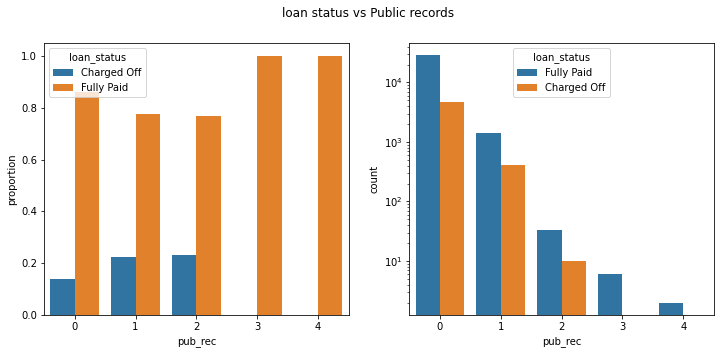

In [100]:
#Proportion of values for each category
df = loan.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)

plt.subplot(122)
sns.countplot(loan.pub_rec, hue='loan_status', data=loan)
plt.yscale('log')
plt.suptitle('loan status vs Public records')
plt.show()

**Observations**:  
The there is increase in deafulted loans for people with derogatory records from 0 to 2 but it is not there for pub_rec 3 adn 4, this is because there very few people took loans in those pub_rec numbers where are as from most borrowers are in 0 pub_rec category.

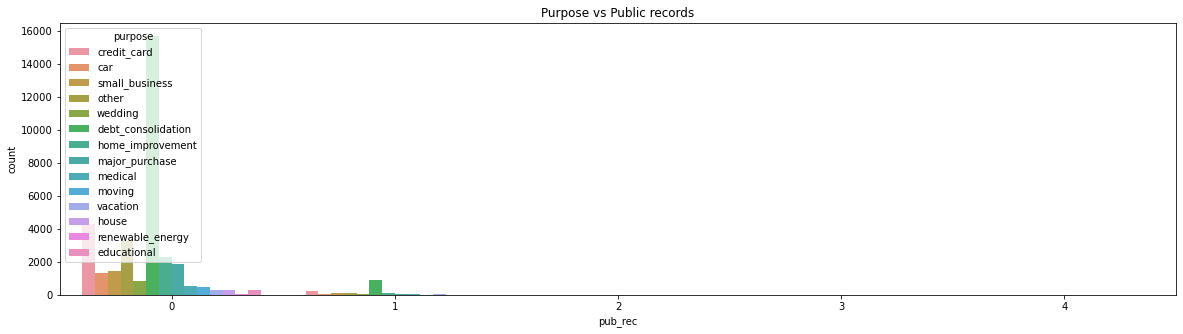

In [101]:
plt.figure(figsize=(20,5))
sns.countplot(loan.pub_rec, hue='purpose', data=loan)
plt.title('Purpose vs Public records')
plt.show()

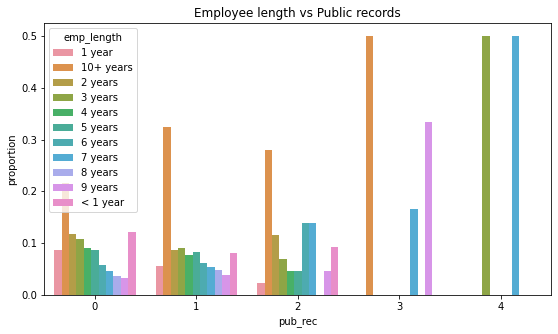

In [102]:
plt.figure(figsize=(20,5))
#Proportion of values for each category
df = loan.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df)
plt.title('Employee length vs Public records')
plt.show()

# pub_rec_bankruptcies
Number of public record bankruptcies

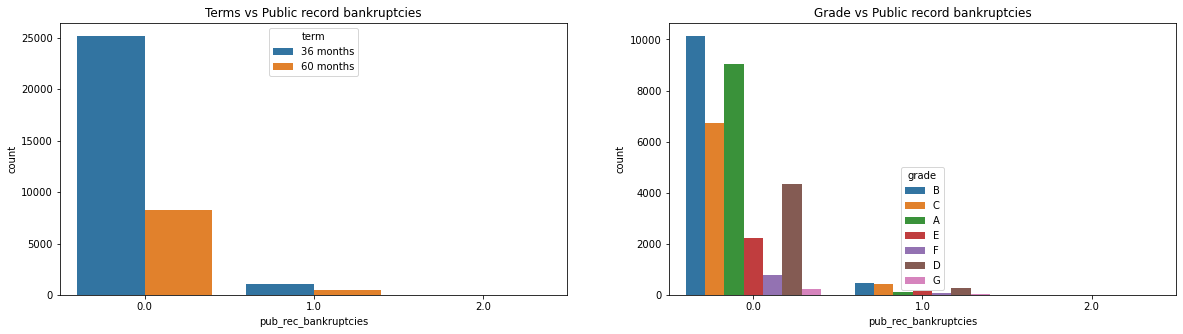

In [103]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(loan.pub_rec_bankruptcies, hue='term', data=loan)
plt.title('Terms vs Public record bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies')
grade_ord = loan.grade.unique()
grade_ord.sort()
sns.countplot(loan.pub_rec_bankruptcies, hue='grade', data=loan)
plt.show()

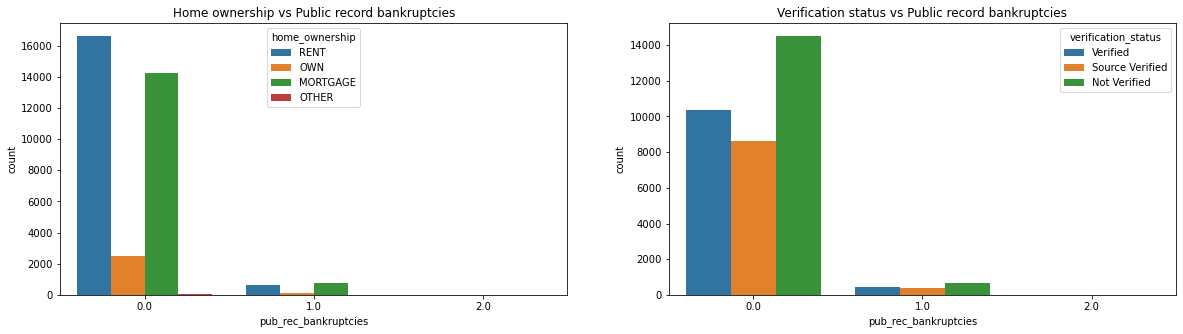

In [104]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(loan.pub_rec_bankruptcies, hue='home_ownership', data=loan)
plt.title('Home ownership vs Public record bankruptcies')
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = loan.verification_status.unique()
verification_status_ord.sort()
sns.countplot(loan.pub_rec_bankruptcies, hue='verification_status', data=loan)
plt.show()

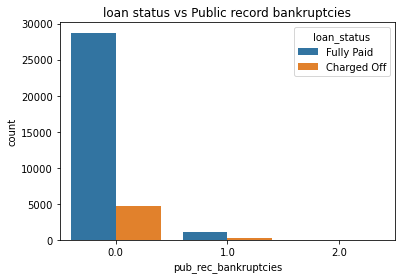

In [105]:
sns.countplot(loan.pub_rec_bankruptcies, hue='loan_status', data=loan)
plt.title('loan status vs Public record bankruptcies')
plt.show()

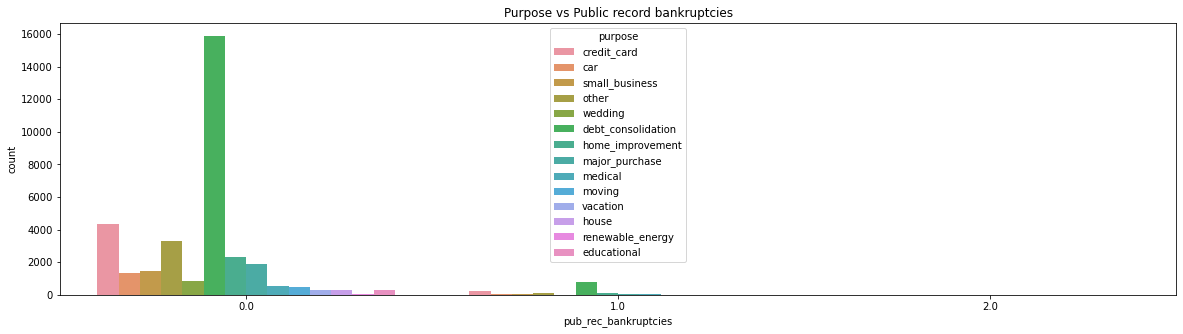

In [106]:
plt.figure(figsize=(20,5))
sns.countplot(loan.pub_rec_bankruptcies, hue='purpose', data=loan)
plt.title('Purpose vs Public record bankruptcies')
plt.show()

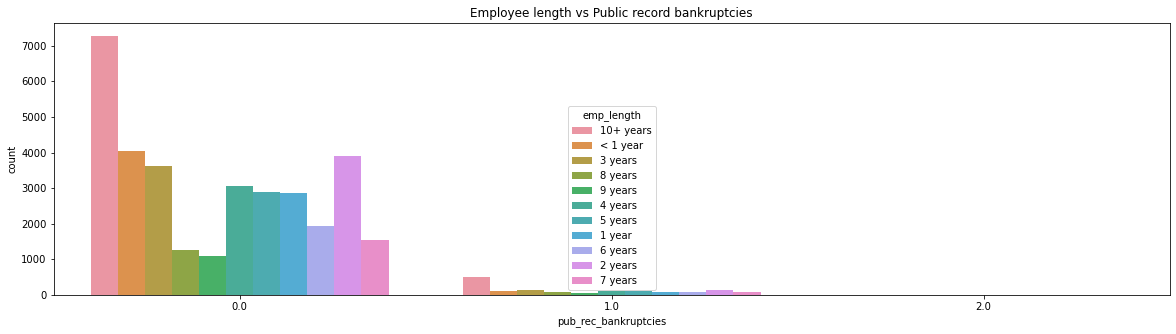

In [107]:
plt.figure(figsize=(20,5))
sns.countplot(loan.pub_rec_bankruptcies, hue='emp_length', data=loan)
plt.title('Employee length vs Public record bankruptcies')
plt.show()


### Approval Loan Amount Ratio

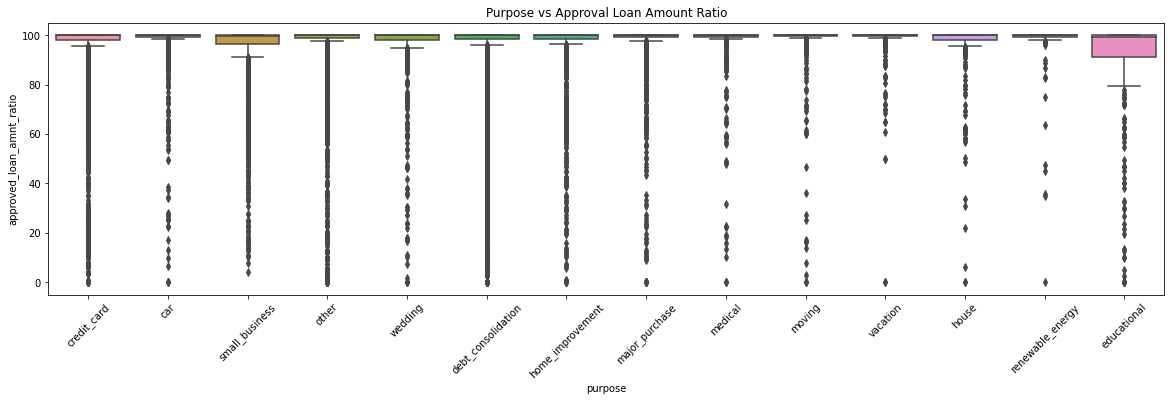

In [108]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.approved_loan_amnt_ratio, data=loan)
plt.title('Purpose vs Approval Loan Amount Ratio')
plt.xticks(rotation=45)
plt.show()

**Observations**:  
The Funded amount by investors is lower than requested loan amount in education and small business purposes.

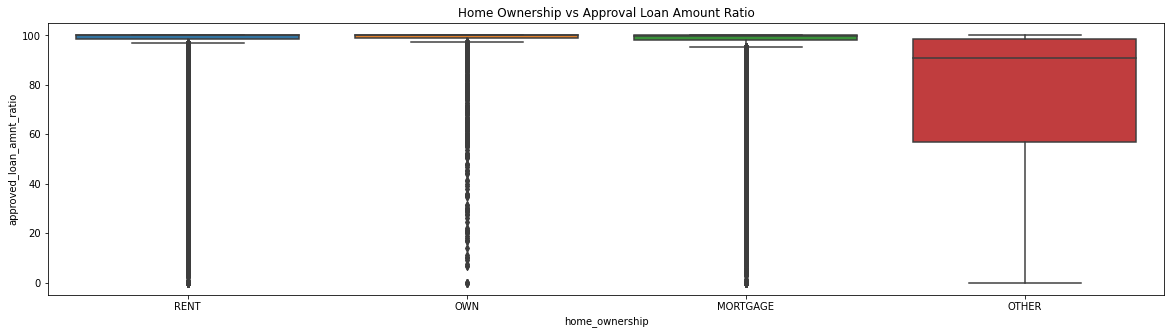

In [109]:
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y=loan.approved_loan_amnt_ratio, data=loan)
plt.title('Home Ownership vs Approval Loan Amount Ratio')
plt.show()

**Observations**:  
Borrowers with Other home ownership are having less approved ratio which mean they got less amount than request amount.


## Bivariate Analysis

### Term vs Loan Status

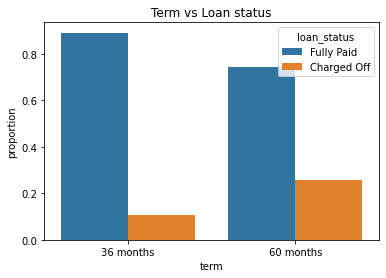

In [110]:
#Proportion of values for each category
df = loan.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')
plt.show()

**Observations**:  
Looks like there  are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

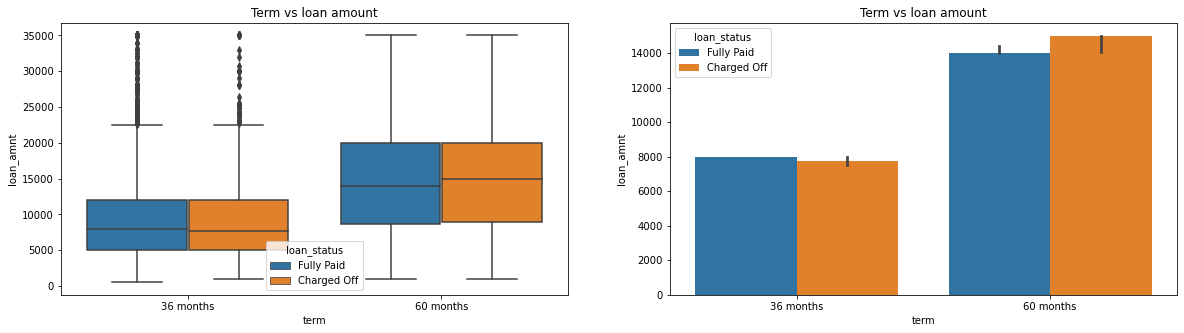

In [111]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

**Observations**:  
Loan amount is not a decider for defaults in both 36 adn 60 months.   
Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

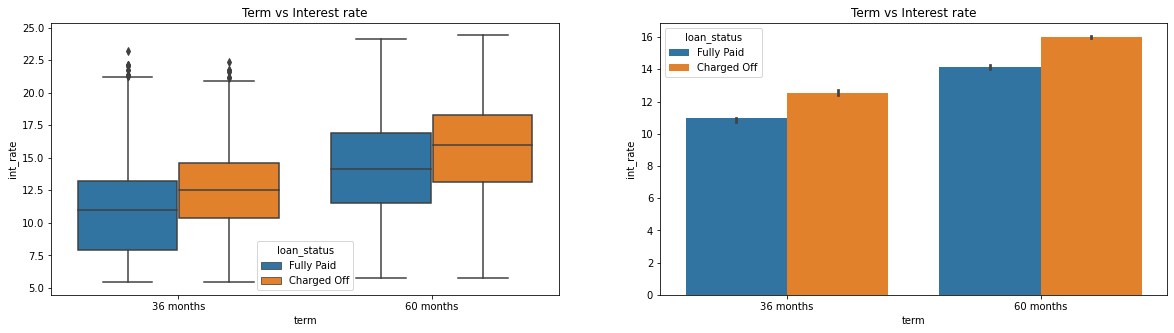

In [112]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

**Observations**  
For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.

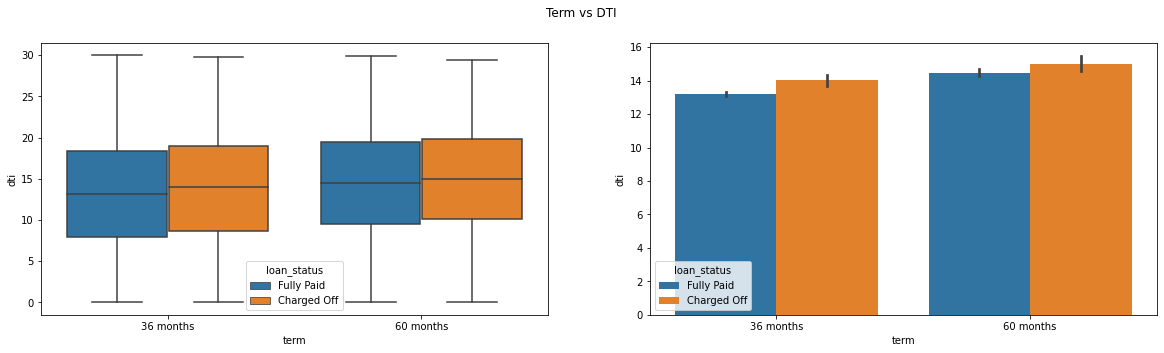

In [113]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

**Observations:**  
Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.


### Grade

In [114]:
#Sorting Grades from A to G
grade_ord = loan.grade.unique()
grade_ord.sort()

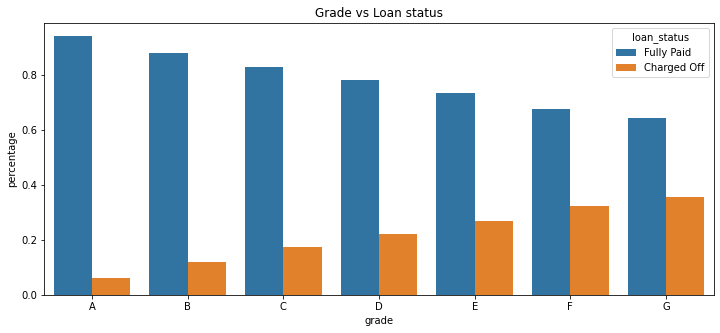

In [115]:
df = loan.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')
plt.show()

**Observations:**  
The above graph clearly says the Charged off increases as grades decreases.

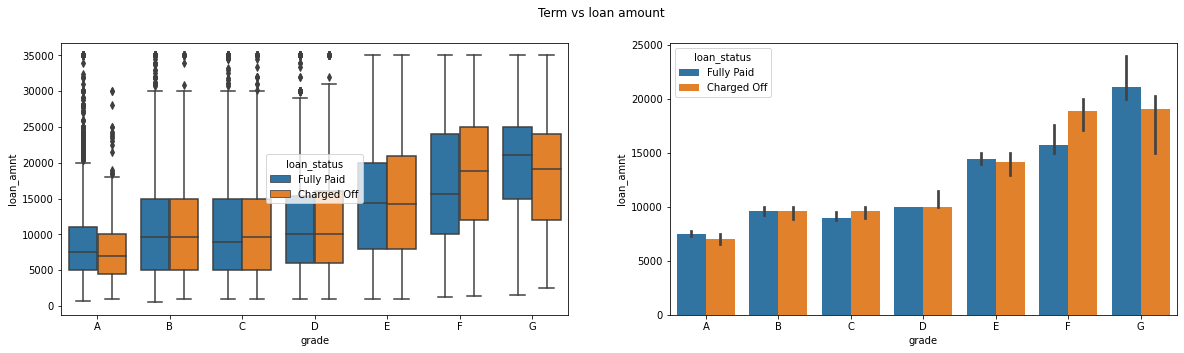

In [116]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=loan, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

**Observations:**  
* For lower grades 'F' and 'G' there are more difference between charged-off and fully paid.  
* The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

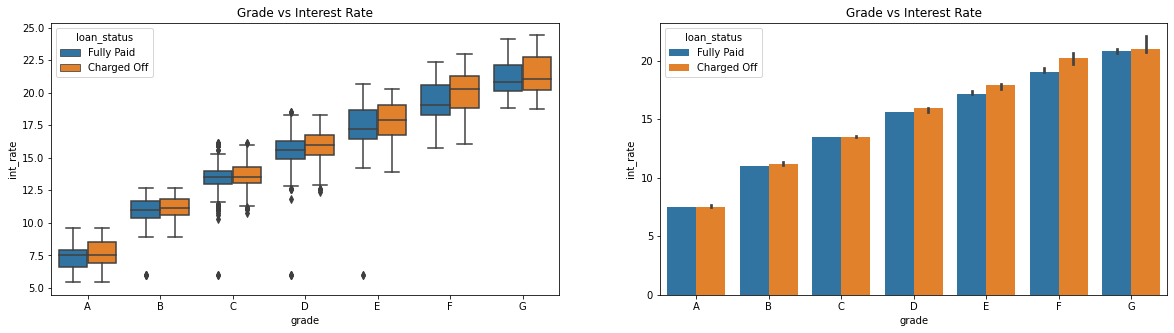

In [117]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=loan, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

**Observations:**  
As grade decreases the interest rate gradually increases. and they are more and more prone to default the loan.

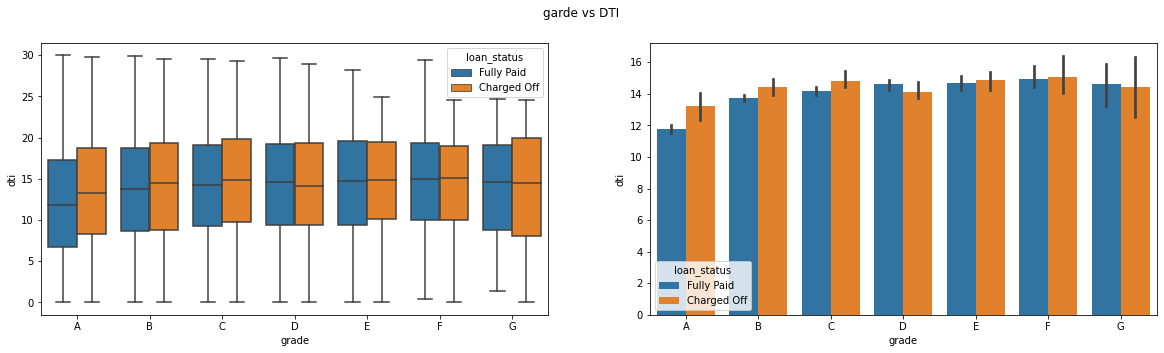

In [118]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=loan, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=loan, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

**Observations:**  
There is not much change in dti in each grade and loan status.


### Home Ownership

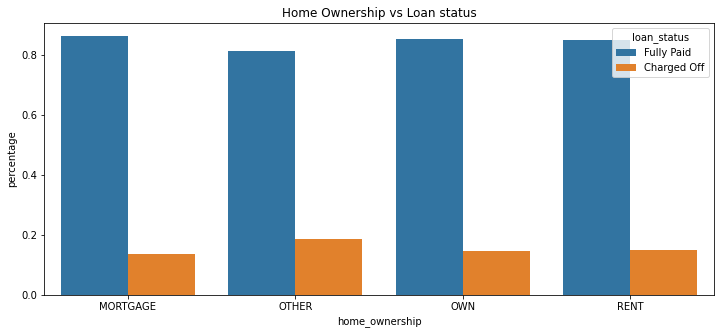

In [119]:
df = loan.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')
plt.show()

**Observations:**   
There is bit high percentage of defaults are recorded in _other_ home ownership category.

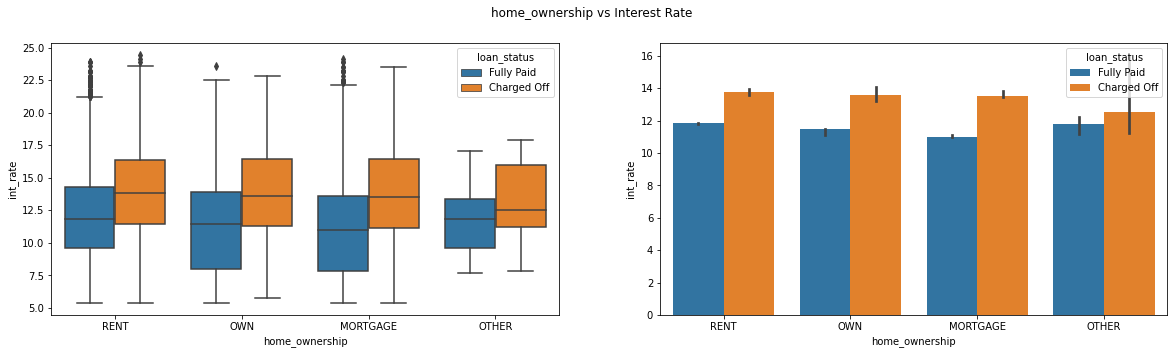

In [120]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

**Observations:**  
Irrespictive of Home ownership, when the interest rate is high the dafault rate also high.

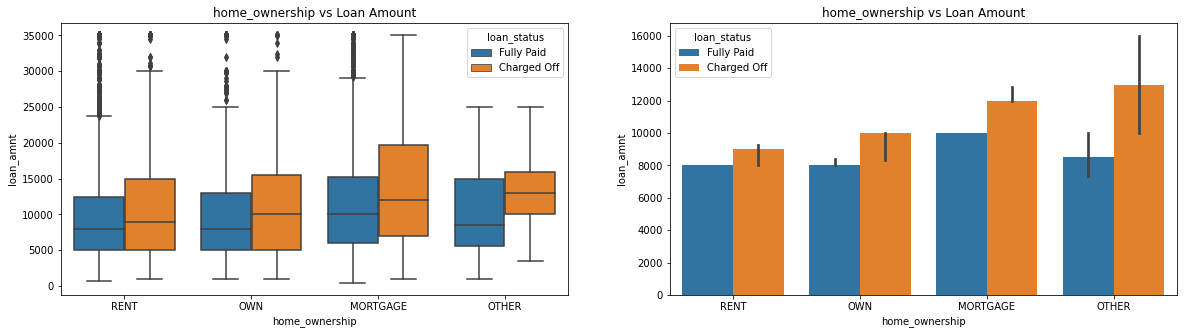

In [121]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()

**Observations:**  
Borrowers who took higher loan amounts defaulted more than others.

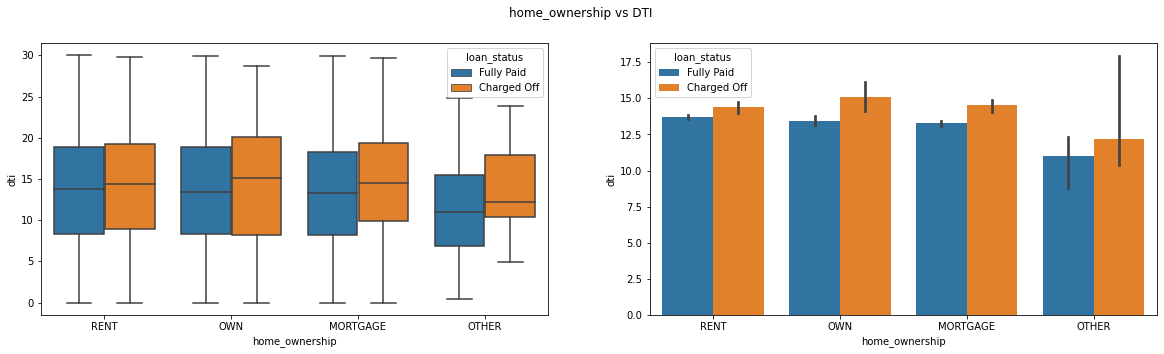

In [122]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

**Observations:**  
* Borrowers in _other_ home ownership category has less dti than other categories.  
* There is equal posibility of home owners defaulting for all the home ownerships.


### Address State

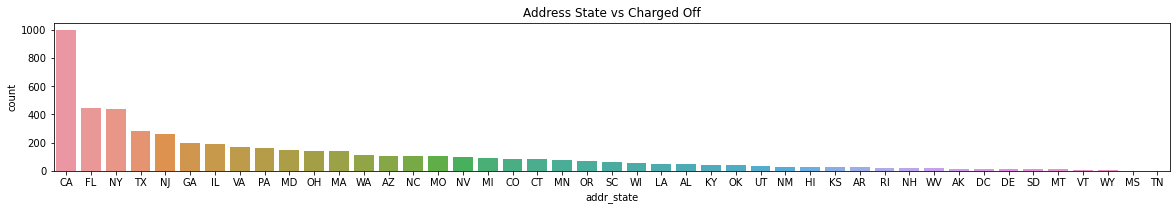

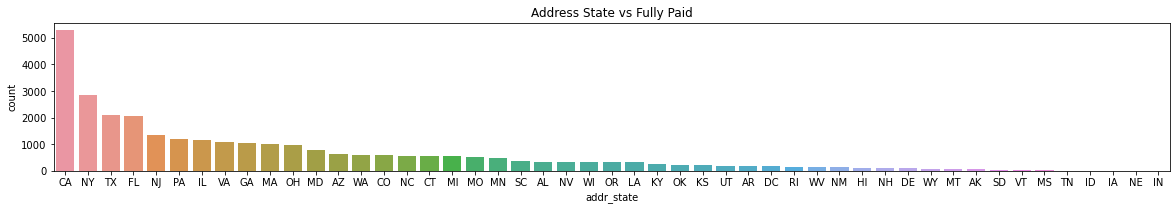

In [123]:
charged_off_df = loan[loan.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = loan[loan.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

**Observations**:   
More number of borrowers defaulted in _CA_ , _FL_ and _NY_ states.


### Verfication Status

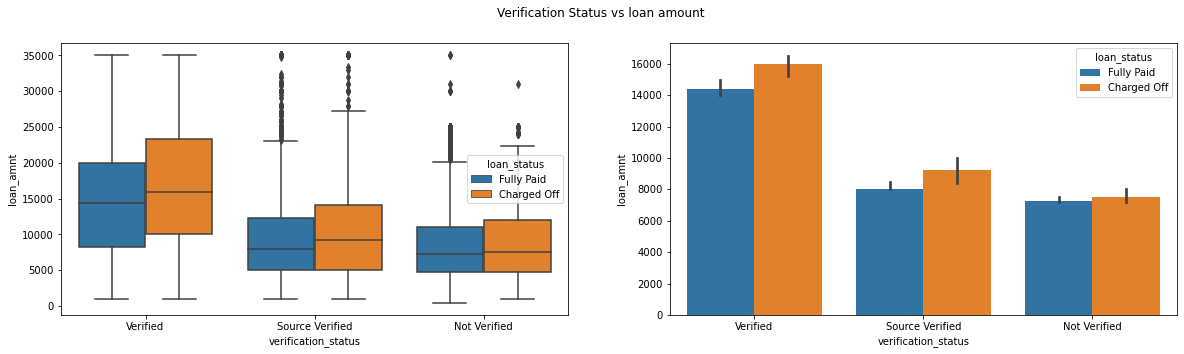

In [124]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

**Observations:**  
* Verified loans are given more loan amounts compared to others.
* There is a slight increase in loan amount for verified and source verified loan when they are defaulted.

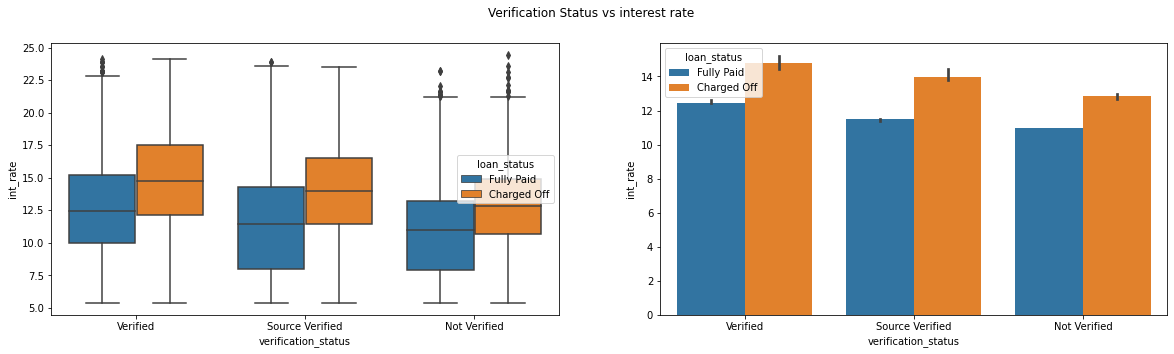

In [125]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=loan)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=loan, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

**Observations:**  
Irrespective of verification status higher interest rates are incurring default of loan.

### Purpose

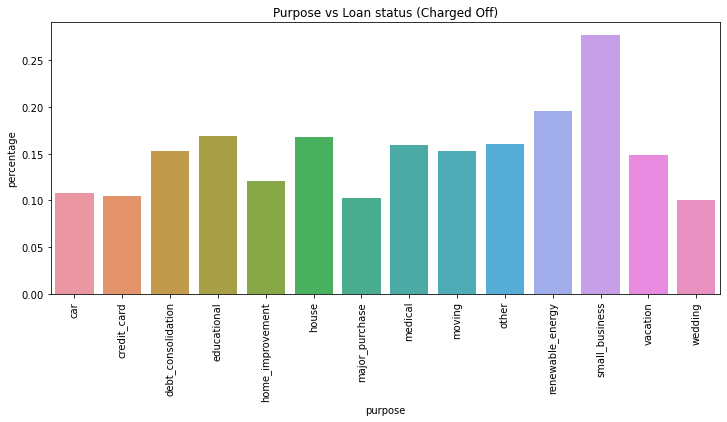

In [126]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')
plt.show()

**Observations:**  
Charged-off are higher for small_business comparitively.

<Figure size 432x288 with 0 Axes>

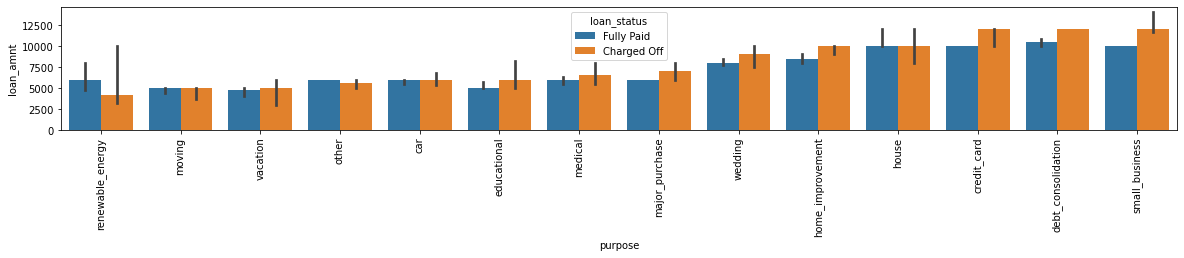

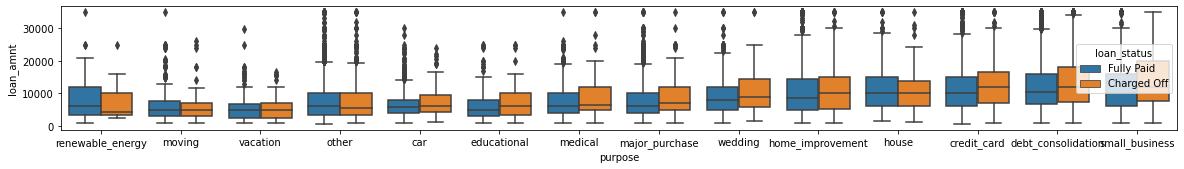

In [127]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)

plt.xticks(rotation=90)


plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= loan, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

**Observations:**  
Small Business has more defaults when the loan amount is also high.

<Figure size 432x288 with 0 Axes>

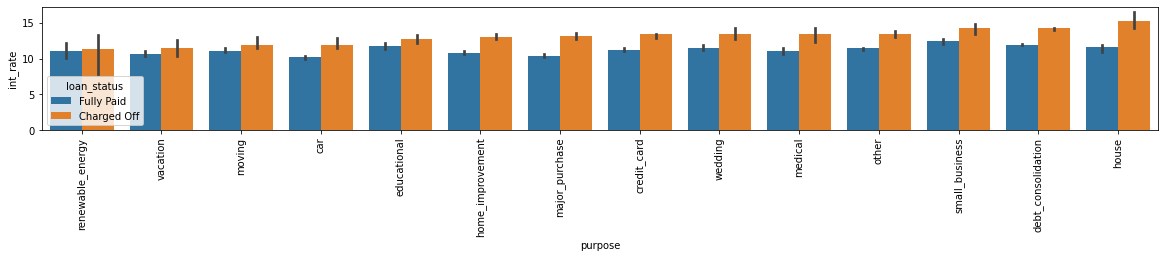

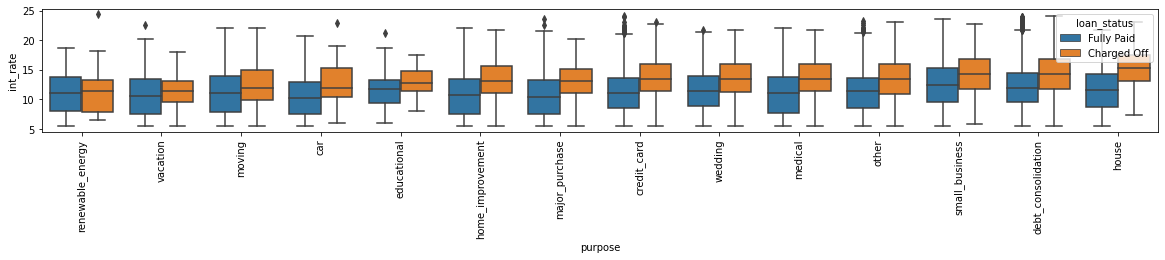

In [128]:
df = loan.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= loan, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= loan, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**  
Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.